<a href="https://colab.research.google.com/github/Movya777/EDA_and_Feature_Engineering/blob/main/%F0%9F%8F%A0House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: Predict the sales price of a house

Dataset: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

# Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read the files

In [2]:
df_train=pd.read_csv("/content/train.csv")

In [3]:
print("Length of the training set is:", len(df_train))

Length of the training set is: 1460


In [4]:
len(df_train.columns)

81

WOAHHHHHHH!!! 🤪 This is my first dataset with largest number of features(81).

Soo exicted to dive in ... 🏊

# Exploratory Data Analysis

# Missing Values

In [5]:
# % of missing values in features
null_features=[features for features in df_train.columns if df_train[features].isnull().sum()>1]
for i in null_features:
  print(i, np.round(df_train[i].isnull().mean(),4), '% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.5973 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


Since there are a lot of features with missing values, lets see the relationship of these features with the targe variable. IF we found out there is no relation, the column can be dropped.

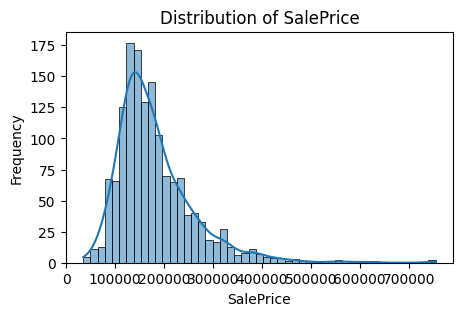

In [ ]:
# Plotting 'SalePrice'
plt.figure(figsize=(5, 3))
sns.histplot(df_train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

The above histogram plot shows the saleprice distribution.

Since there is a presence of outliers, lets go with median

In the below code, a copy is created and nan records are replaced with 1 else 0.

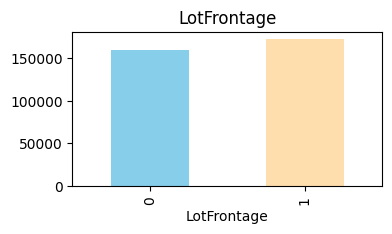

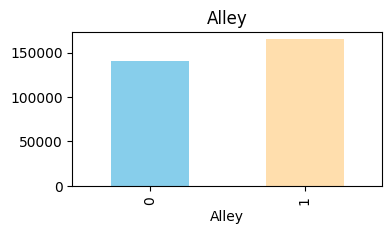

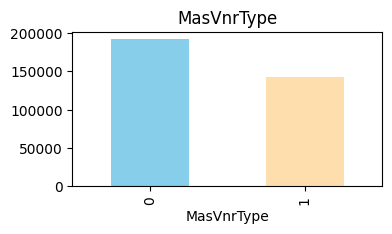

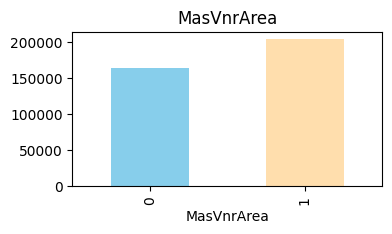

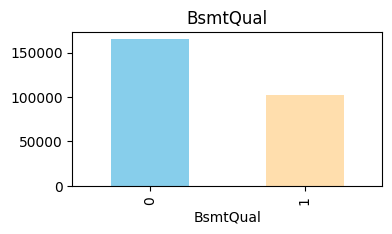

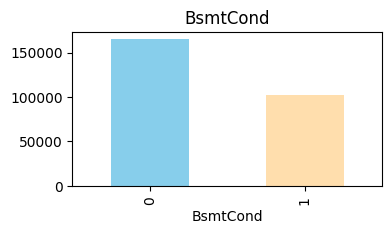

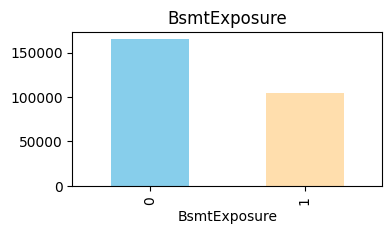

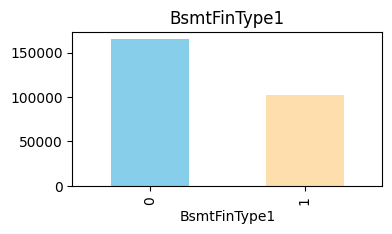

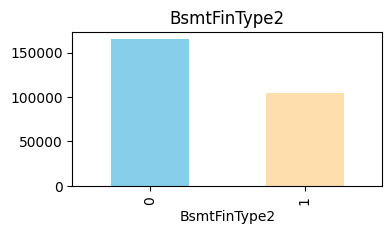

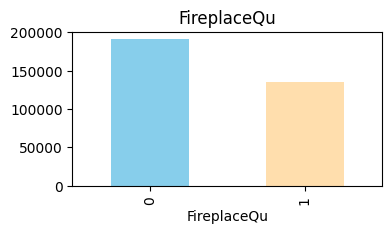

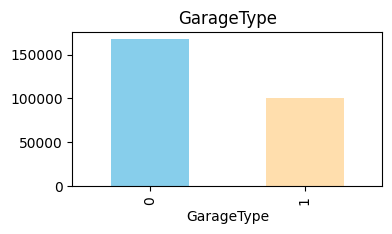

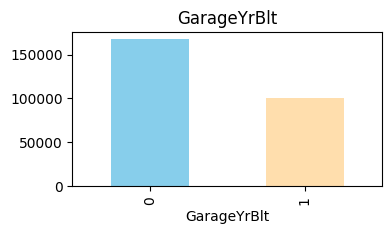

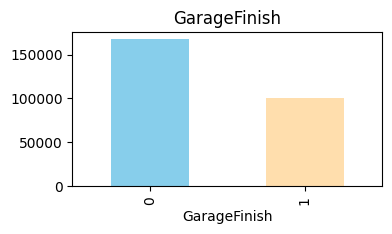

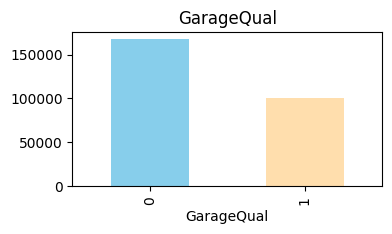

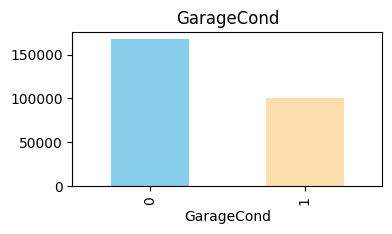

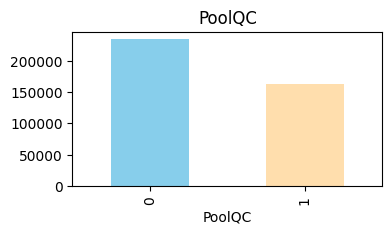

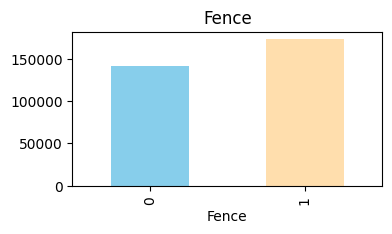

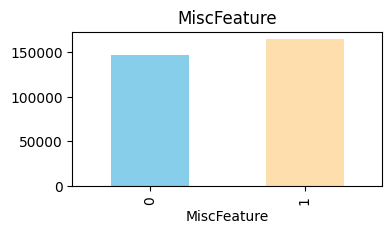

In [ ]:
for i in null_features:
  data=df_train.copy()
  data[i]=np.where(data[i].isnull(),1,0)
  data.groupby(i)['SalePrice'].median().plot.bar(color=['skyblue', 'navajowhite'], figsize=(4,2))
  plt.title(i)
  plt.show()

Observations:

1.  From the plots, it is visible than nan values have salesprice either high or low, which implies that there is relation between the nan records and target variable.

# Numerical features

In [6]:
num_features=[feature for feature in df_train.columns if df_train[feature].dtypes !='O']
print("Length of numerical features: ",len(num_features))

Length of numerical features:  38


# Temporal DateTime variables

In the dataset we have 4 variables with year. These are called temporal variables. We need to extract information from these features (as in extract the number of years through the difference)

In [7]:
 # To find out the year features
year_features=[feature for feature in df_train.columns if 'Yr' in feature or 'Year' in feature]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSold')

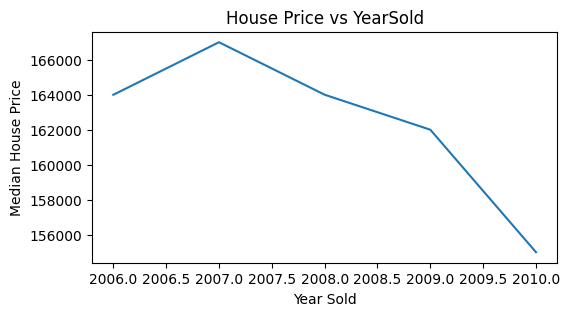

In [ ]:
# Analysing temporal datetime features
df_train.groupby('YrSold')['SalePrice'].median().plot(figsize=(6,3))
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs YearSold')

Observation:

From 2007 to 2010, as year passes the salesprice kept on decreasing

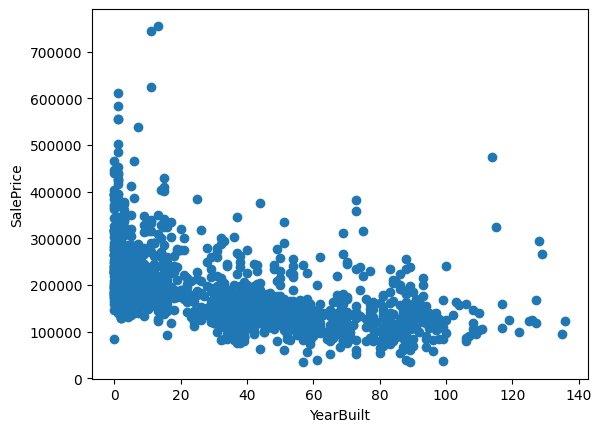

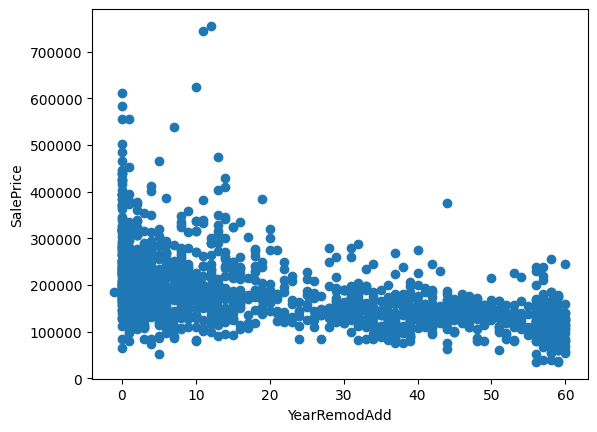

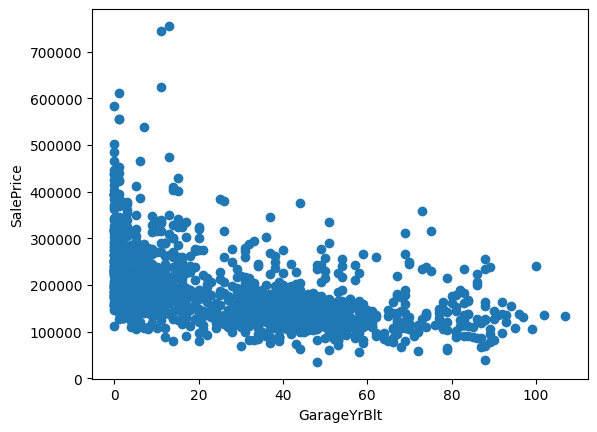

In [ ]:
# difference of other year features with yearsold
for feature in year_features:
  if feature !='YrSold':
    data2=df_train.copy()
    data2[feature]=data2['YrSold']-data2[feature]

    plt.scatter(data2[feature],data2['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.figsize=(4,2)
    plt.show()

As the difference between the yr built and sold is huge, the price is low

Numerical variables are usually of 2 types:

1. Discrete --> repetition
2. Continous

# Discrete Variables

In [8]:
dis_features=[feature for feature in num_features if len(df_train[feature].unique())<25 and feature not in year_features+['Id']]
# 25 is self given threshold
dis_count=len(dis_features)
dis_count

17

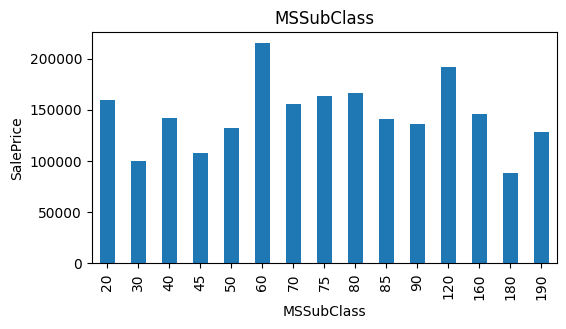

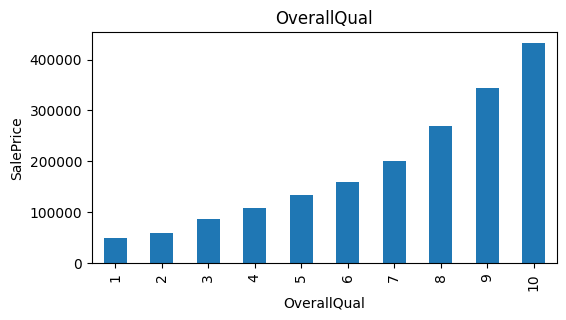

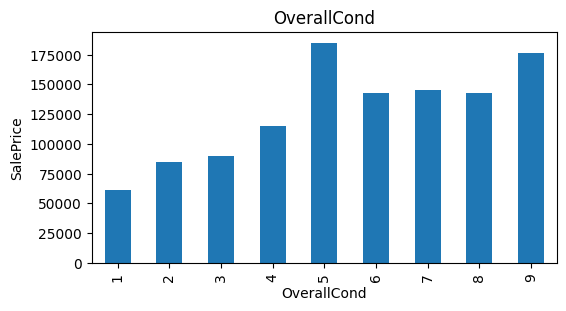

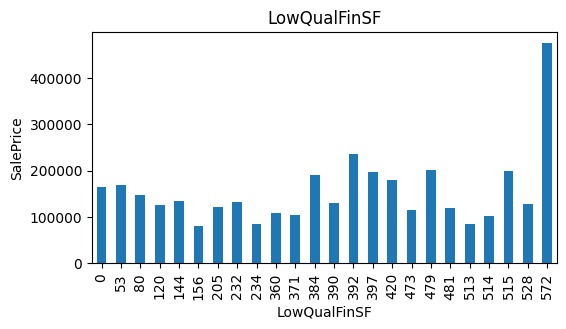

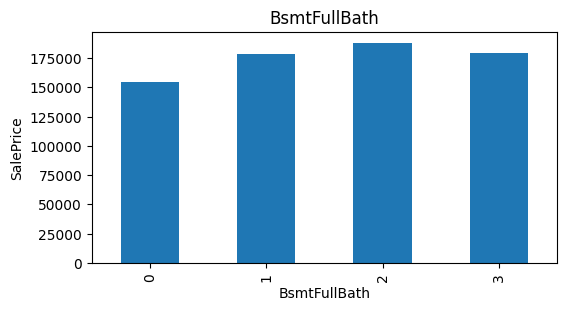

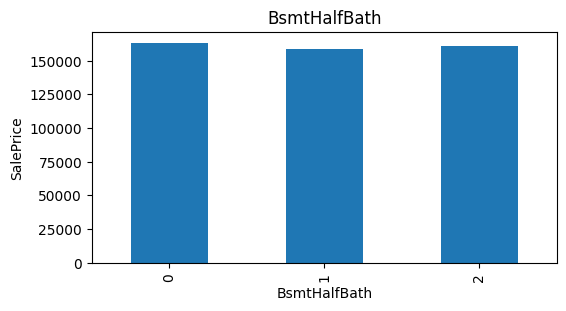

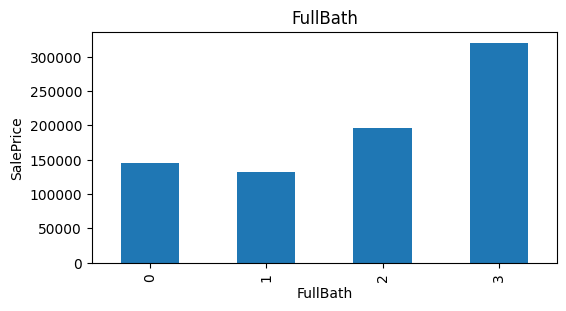

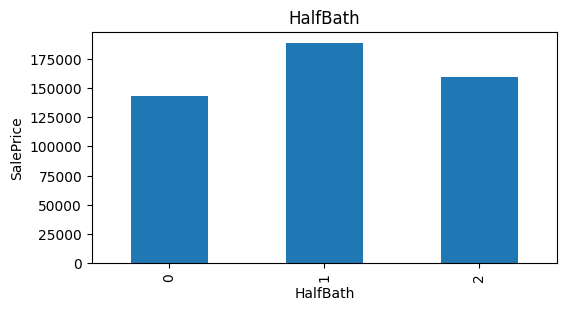

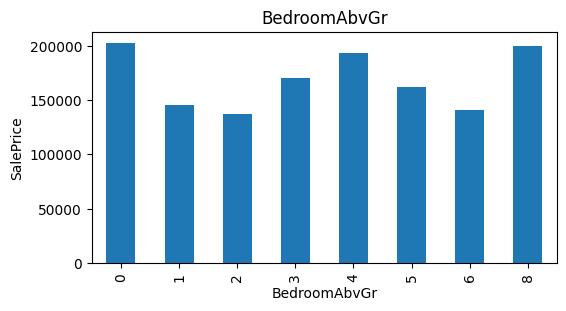

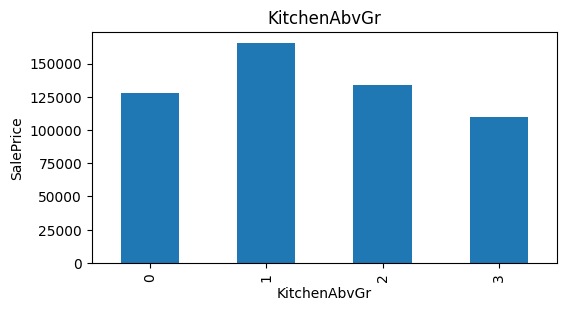

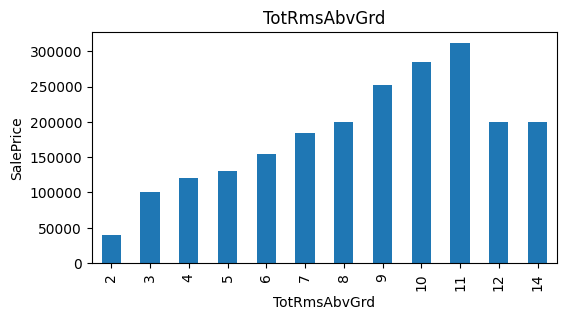

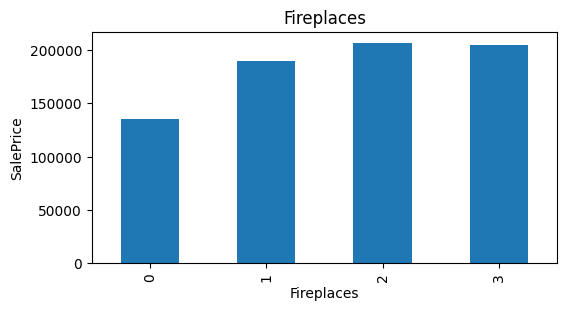

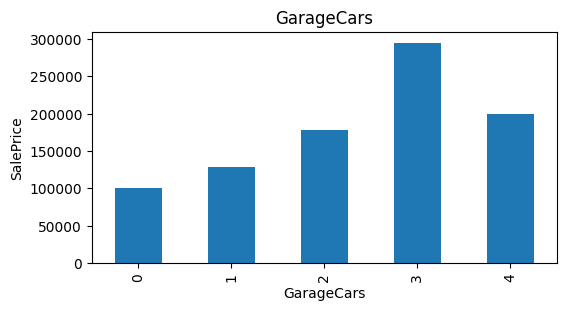

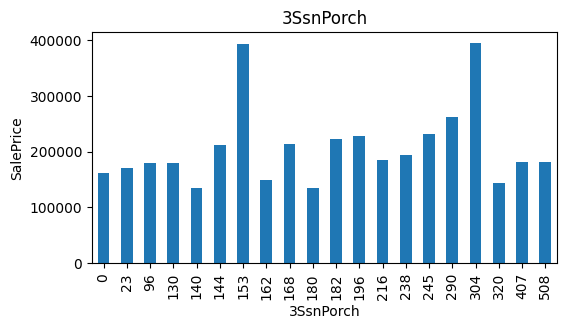

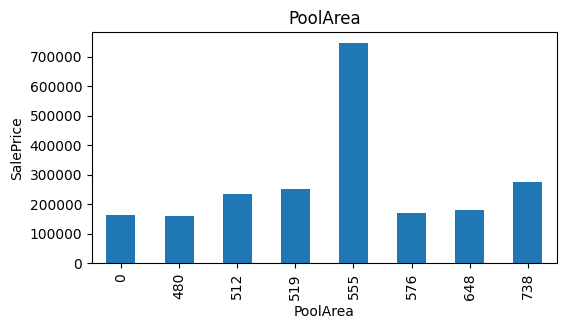

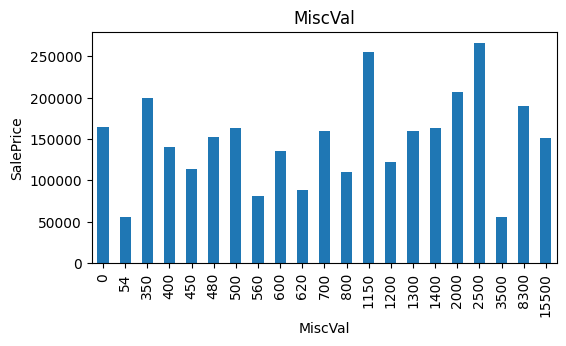

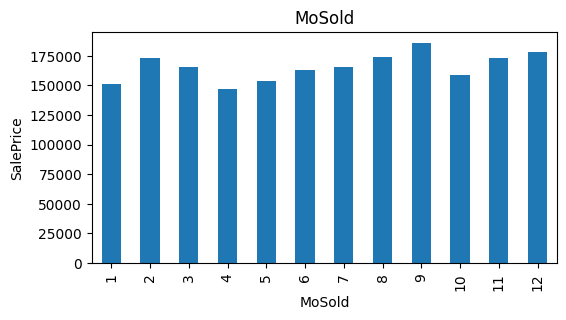

In [ ]:
# Relation between discrete value of the variable and salesprice
# check which discrete value influences the saleprice
for feature in dis_features:
  data=df_train.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar(figsize=(6,3))
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

If we look at the OverallQual, as quality increases, there is increase in saleprice. Implies that there is relationship between discrete features and target variable.

# Continous variables

In [9]:
con_features=[feature for feature in num_features if feature not in dis_features + year_features+['Id']]
print("NUmber of continous features:", len(con_features))

NUmber of continous features: 16


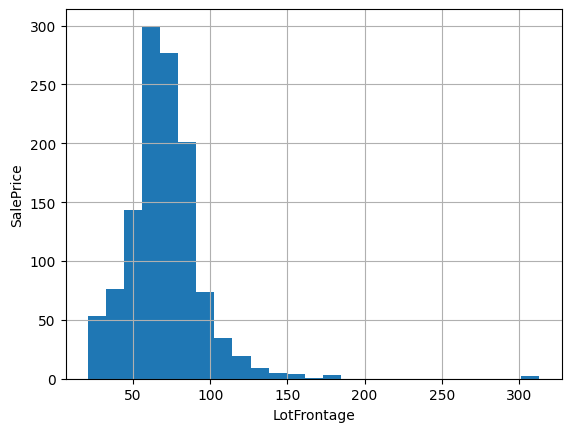

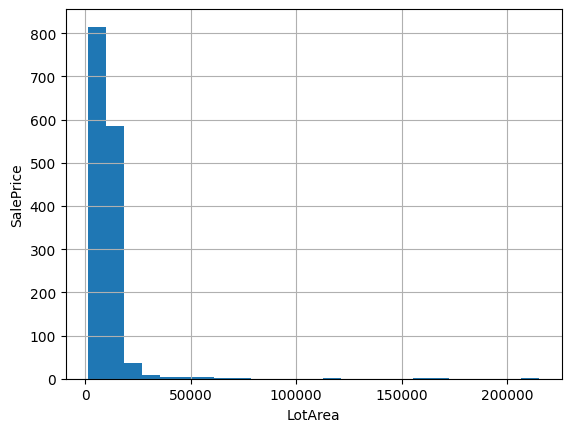

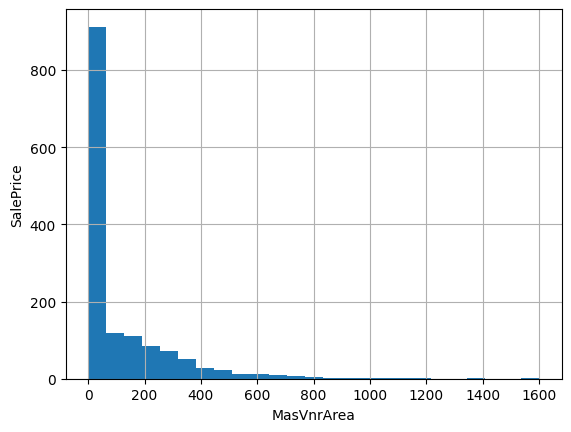

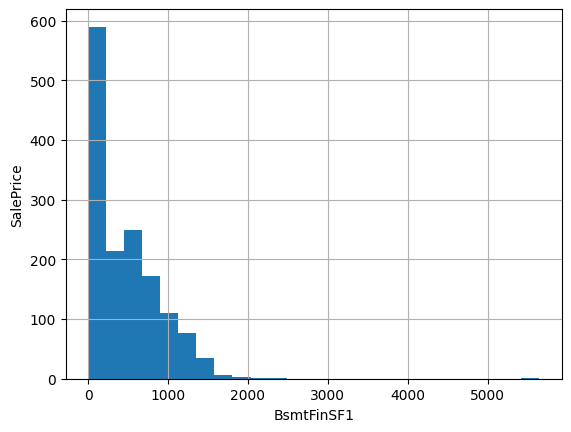

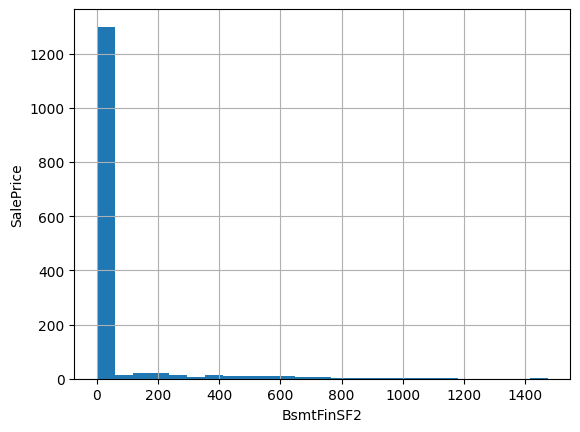

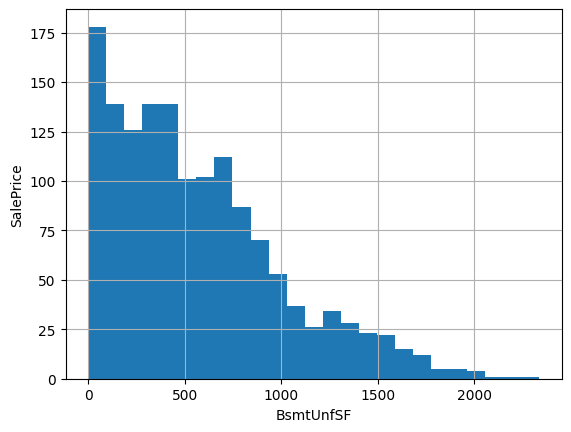

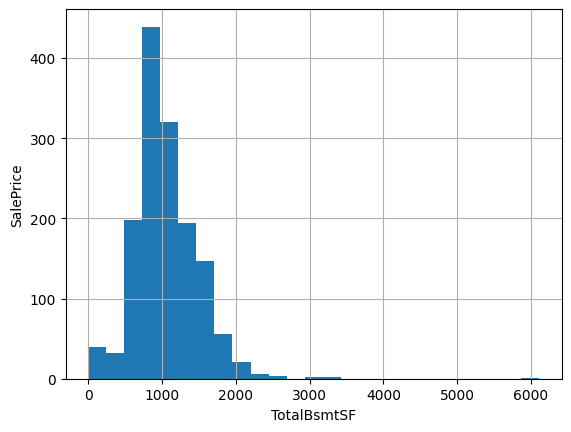

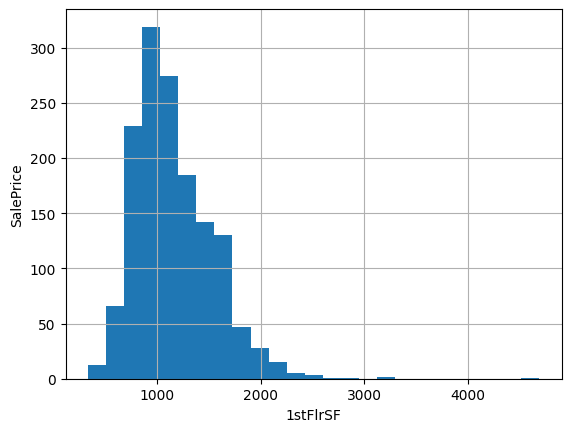

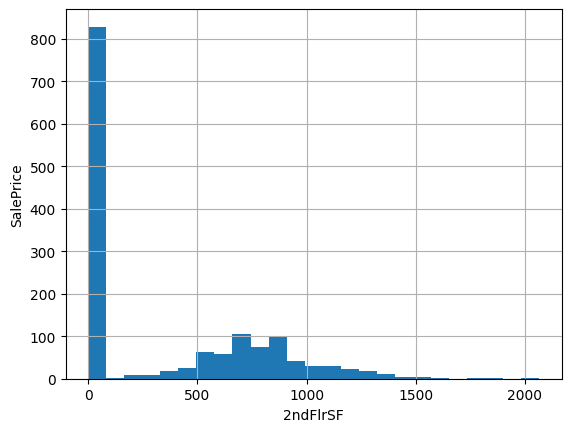

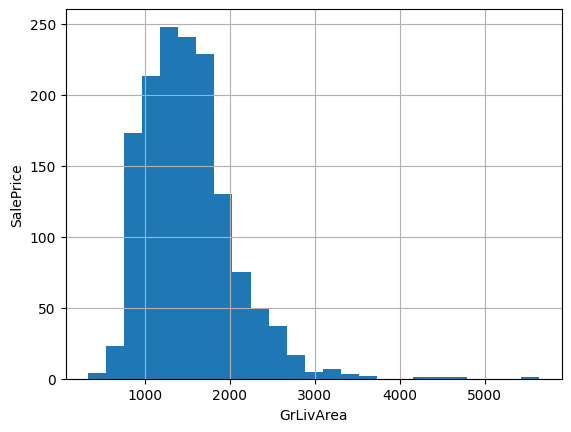

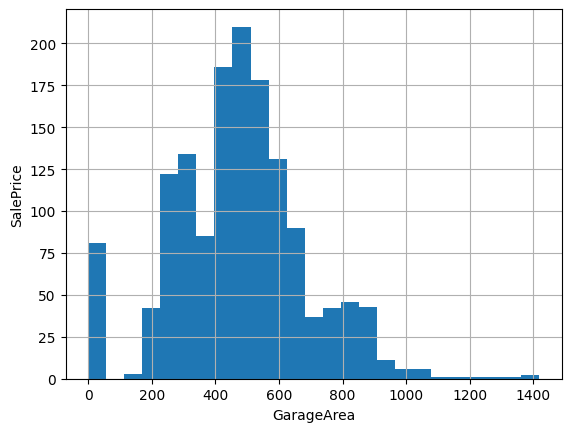

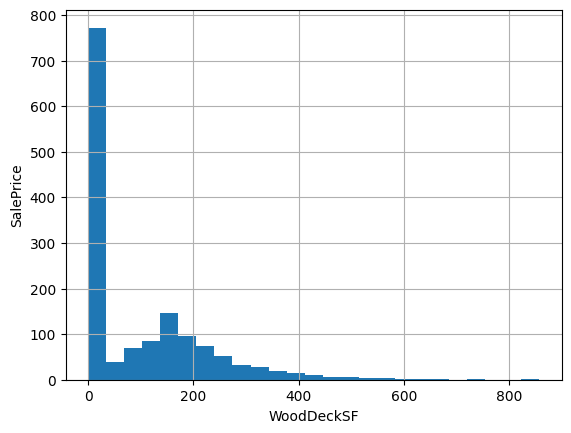

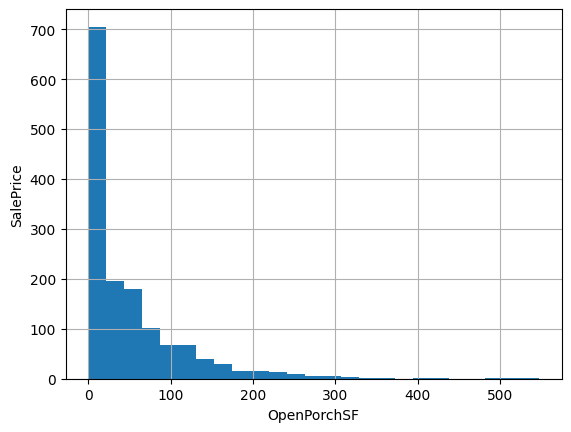

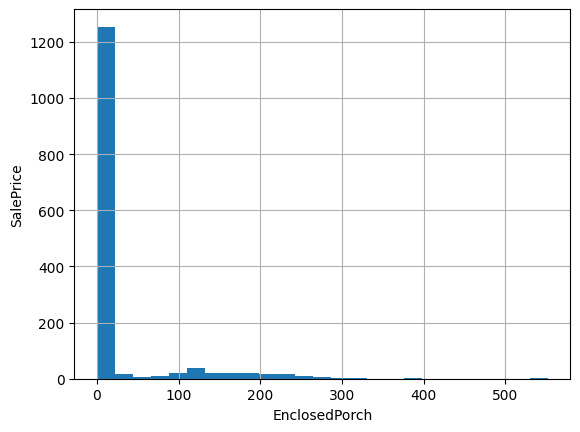

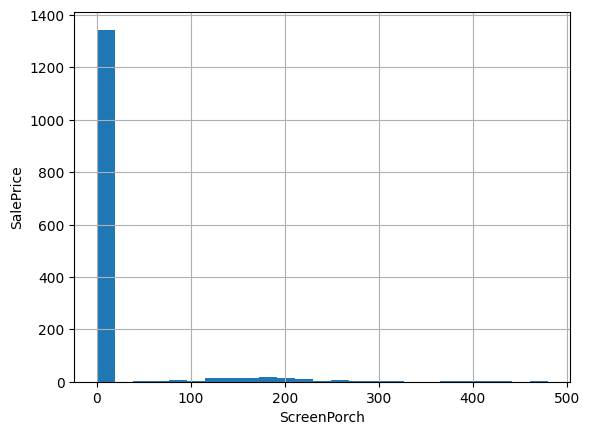

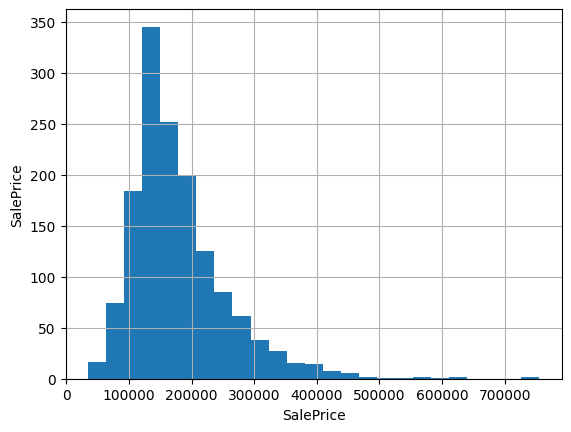

In [ ]:
# Analyze the distribution of continous features
for feature in con_features:
  data=df_train.copy()
  data[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.show()

Observation:
A few of the variables follow normal dstrubution and a few do not.


We apply logarithmic transformation on skewed distrubution to convert into normal distribution

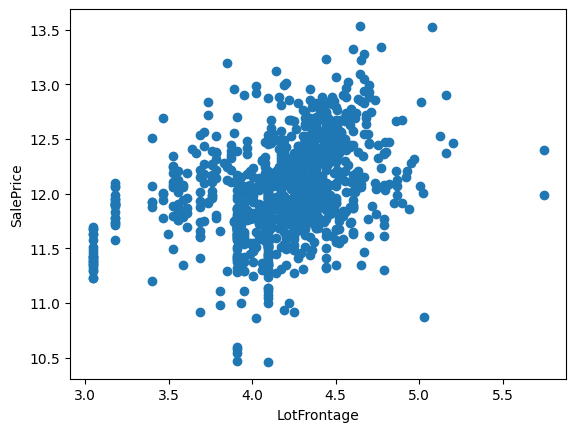

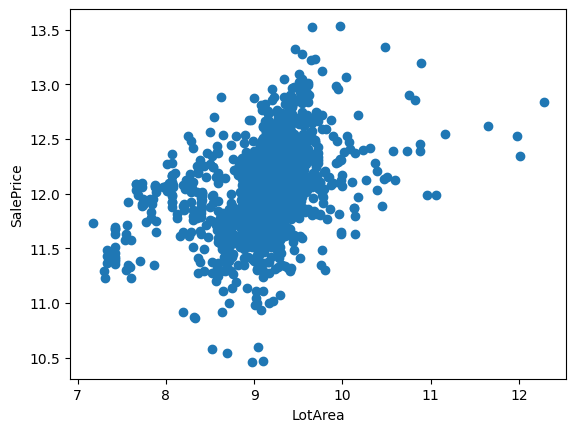

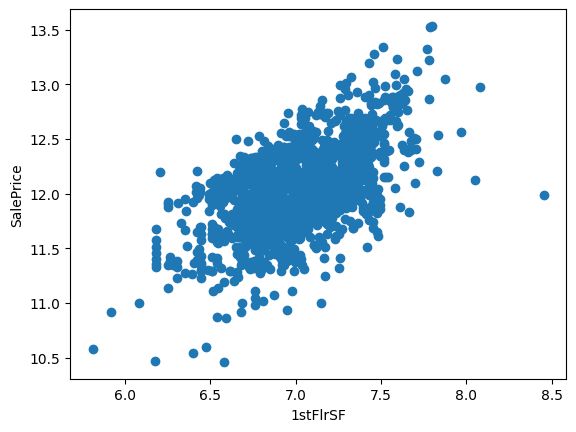

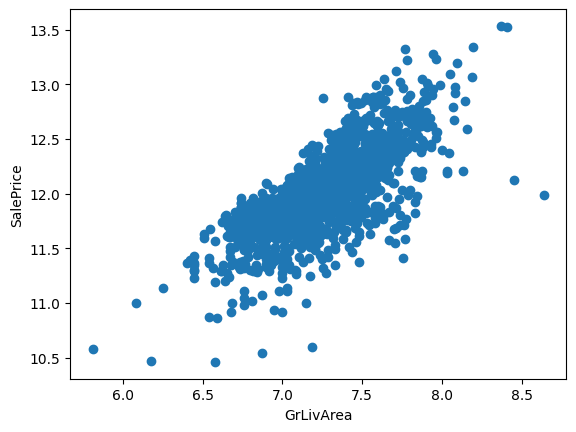

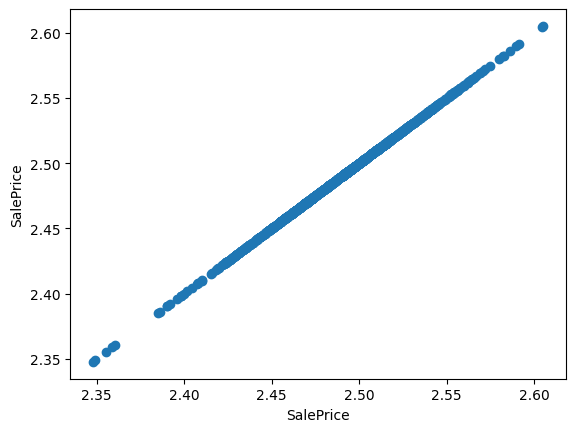

In [ ]:
for feature in con_features:
  data=df_train.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data['SalePrice']=np.log(data['SalePrice'])
    #data[feature].hist(bins=25)
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()


# Outliers

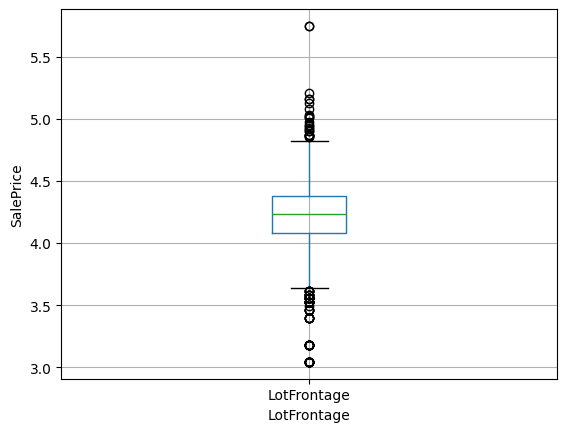

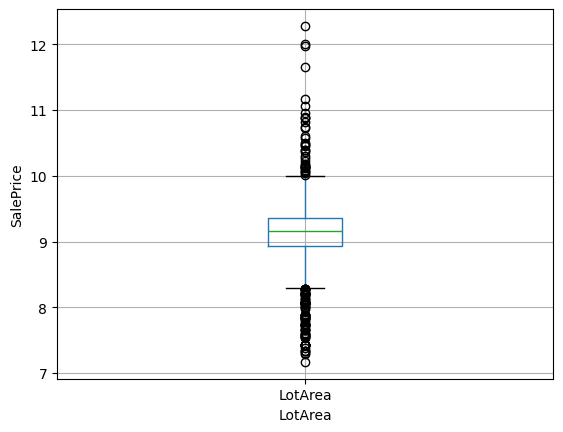

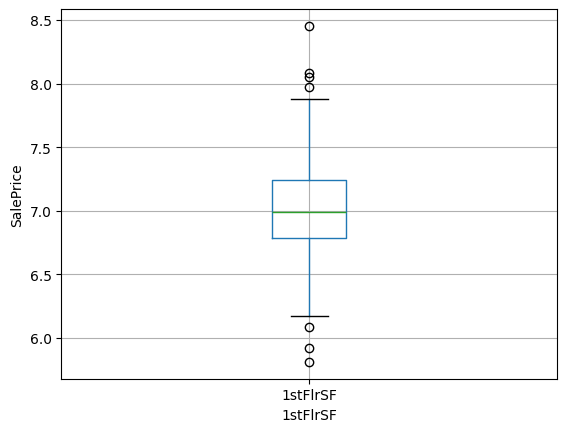

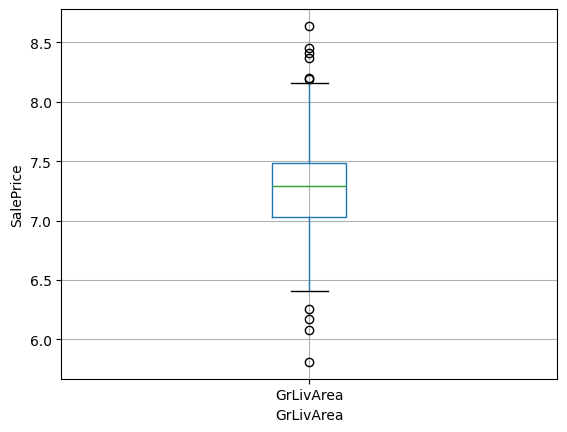

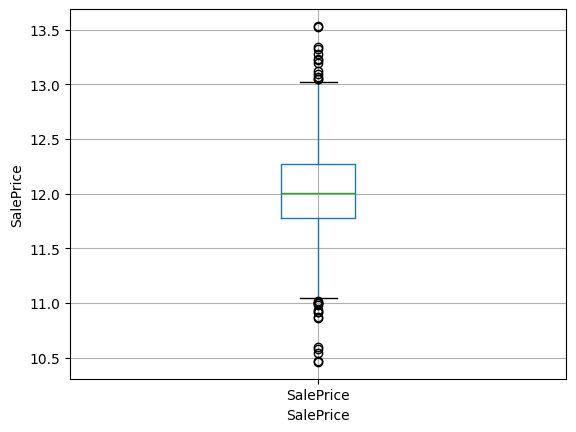

In [ ]:
for feature in con_features:
  data=df_train.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

There are outliers

# Categorical Variables

In [10]:
cat_features=[feature for feature in df_train.columns if feature not in num_features]
print('Number of categorical features:', len(cat_features))

Number of categorical features: 43


In [11]:
df_train[cat_features].head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
# find unique categories in each categorical feature
for feature in cat_features:
  print('NUmber of unique categories in', feature, 'is:', len(df_train[feature].unique()))

NUmber of unique categories in MSZoning is: 5
NUmber of unique categories in Street is: 2
NUmber of unique categories in Alley is: 3
NUmber of unique categories in LotShape is: 4
NUmber of unique categories in LandContour is: 4
NUmber of unique categories in Utilities is: 2
NUmber of unique categories in LotConfig is: 5
NUmber of unique categories in LandSlope is: 3
NUmber of unique categories in Neighborhood is: 25
NUmber of unique categories in Condition1 is: 9
NUmber of unique categories in Condition2 is: 8
NUmber of unique categories in BldgType is: 5
NUmber of unique categories in HouseStyle is: 8
NUmber of unique categories in RoofStyle is: 6
NUmber of unique categories in RoofMatl is: 8
NUmber of unique categories in Exterior1st is: 15
NUmber of unique categories in Exterior2nd is: 16
NUmber of unique categories in MasVnrType is: 4
NUmber of unique categories in ExterQual is: 4
NUmber of unique categories in ExterCond is: 5
NUmber of unique categories in Foundation is: 6
NUmber 

Expect Neighborhood, Exterior1st, Exterior2nd, SaleType (having more categories), other categorical columns can be handled using one-hot encoding

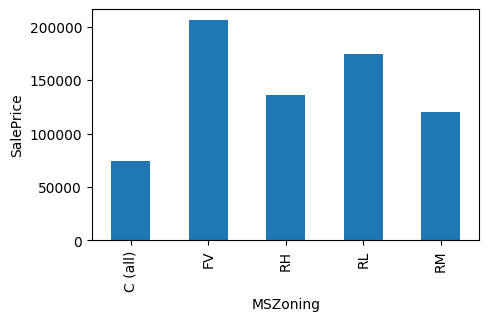

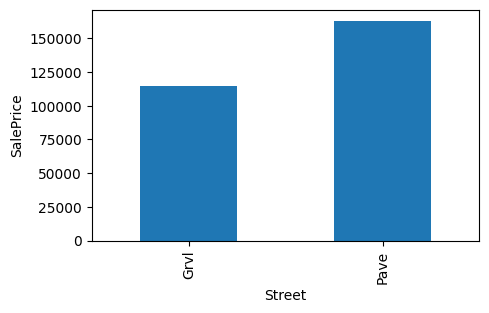

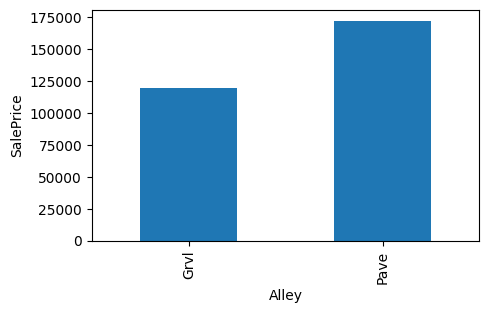

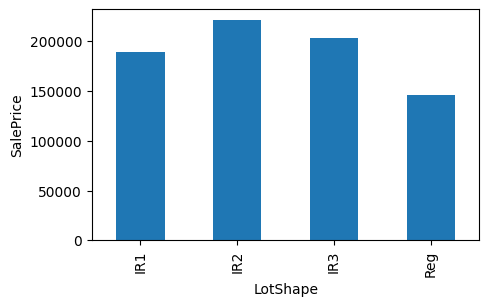

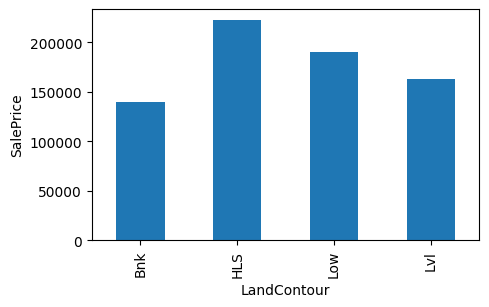

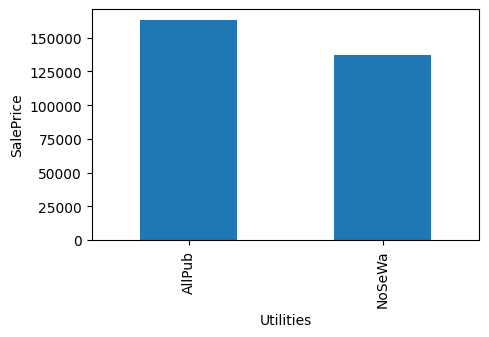

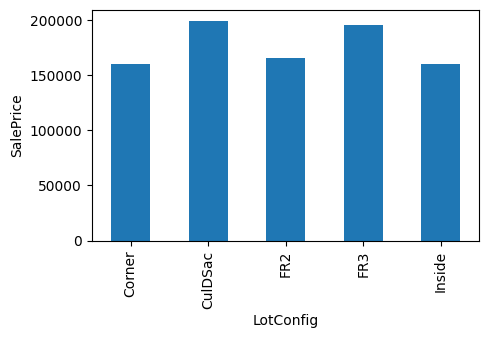

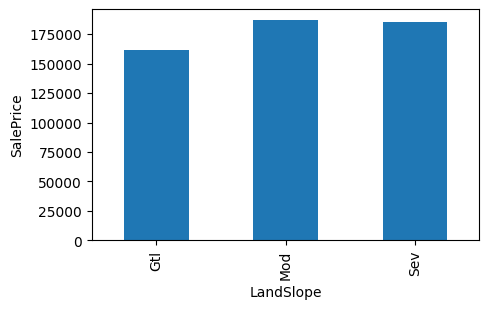

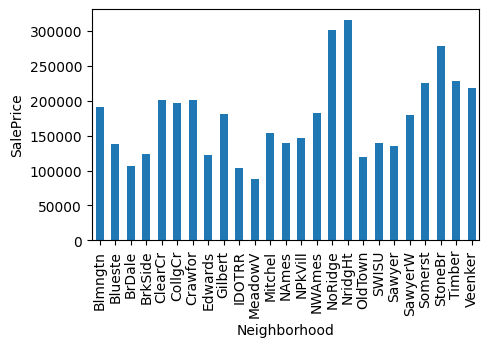

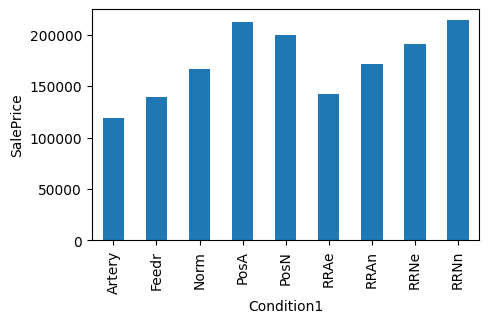

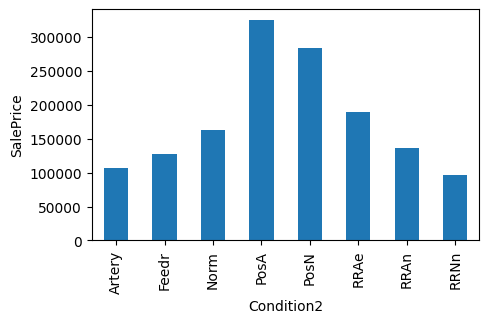

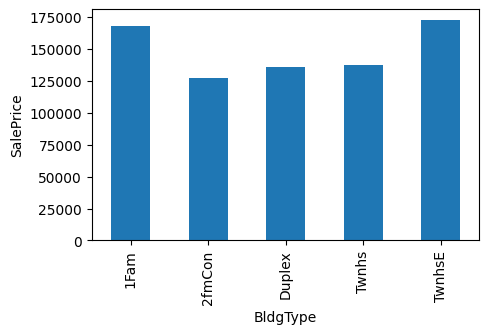

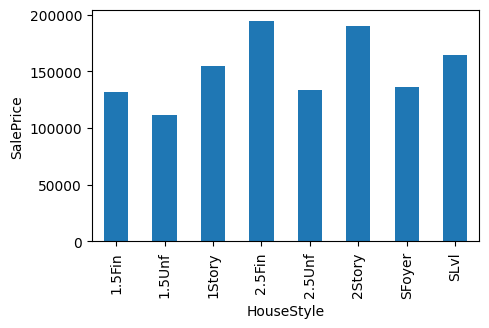

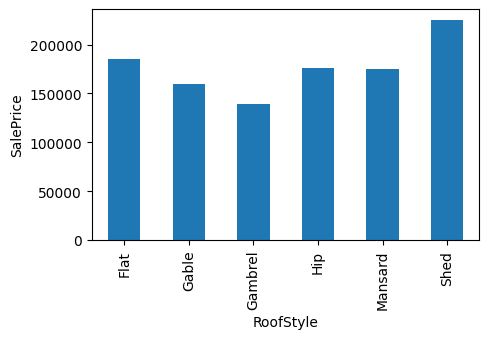

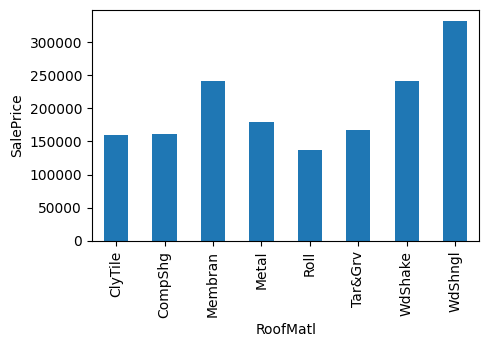

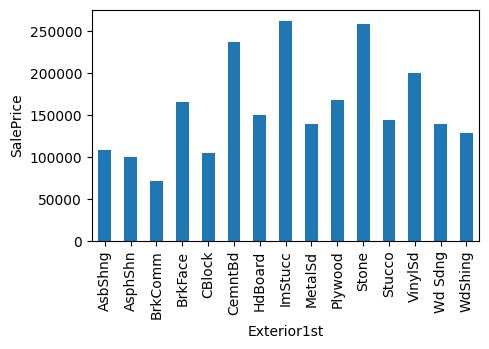

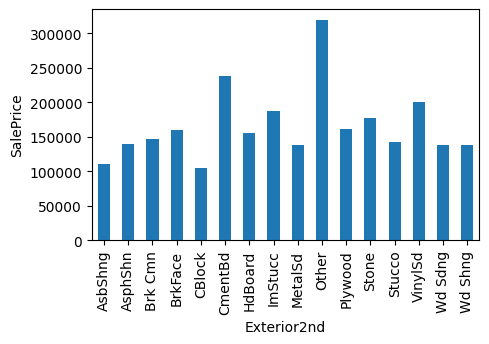

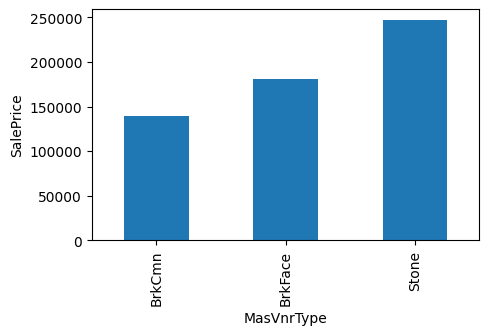

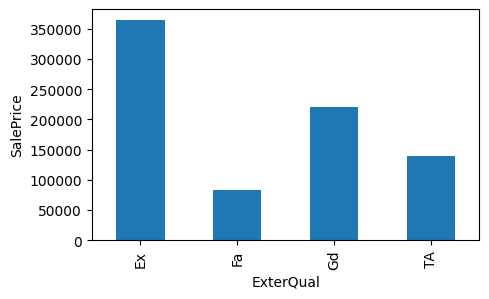

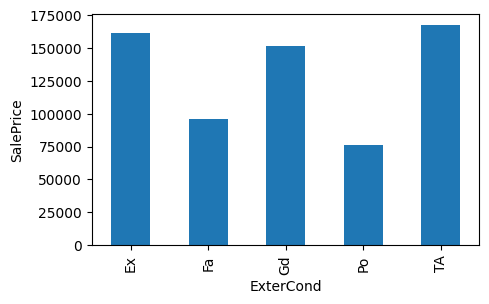

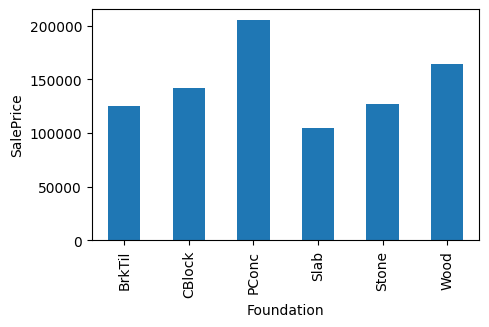

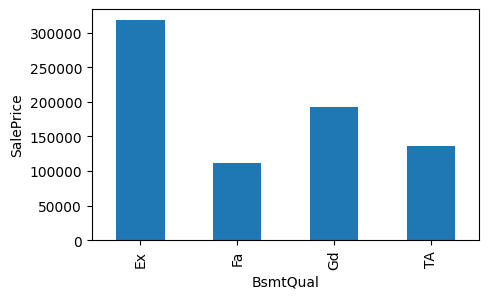

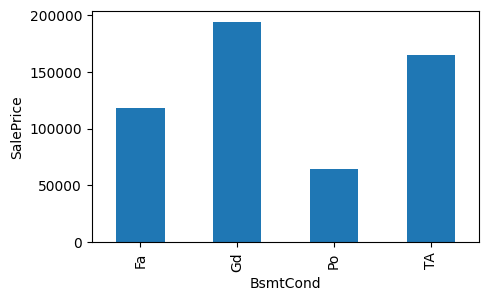

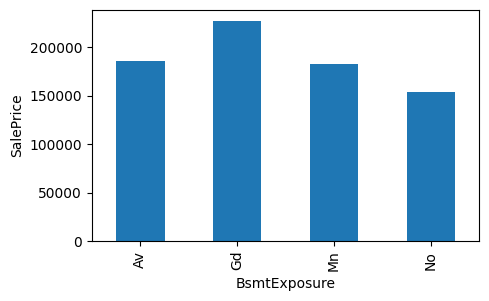

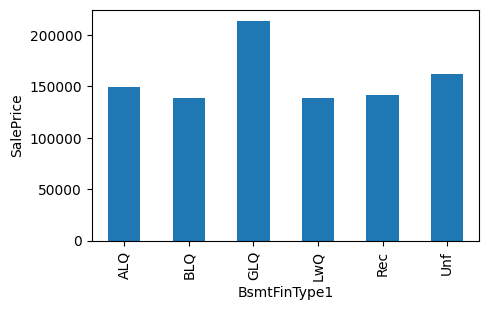

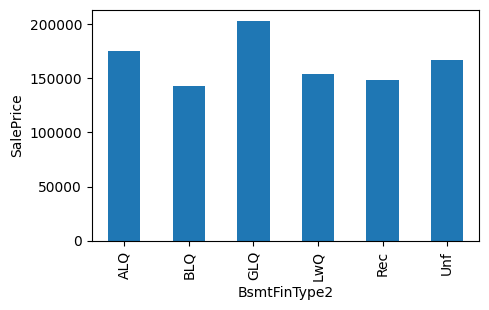

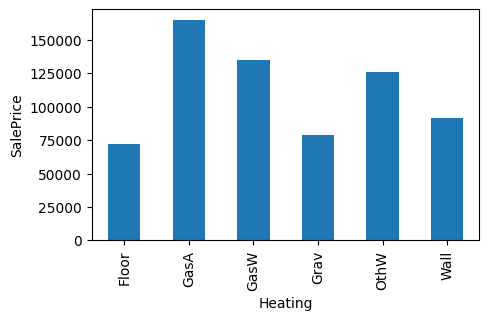

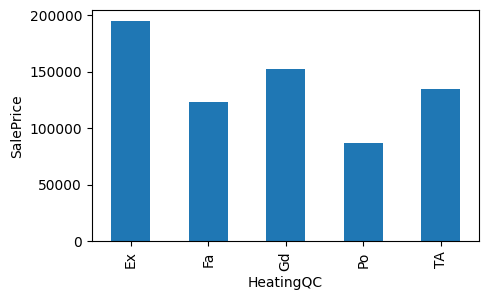

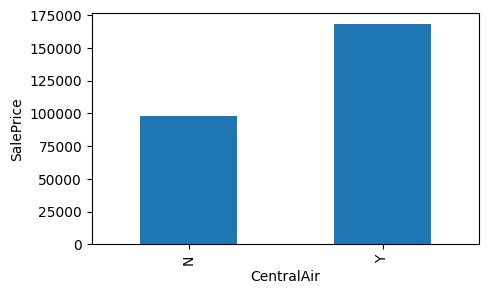

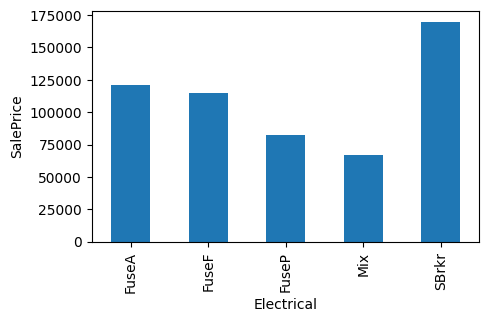

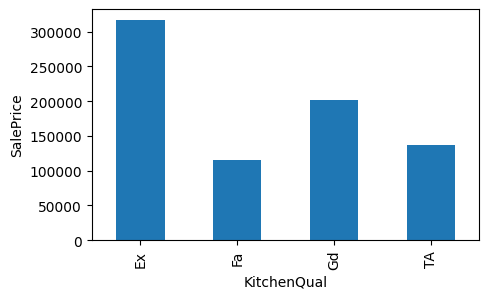

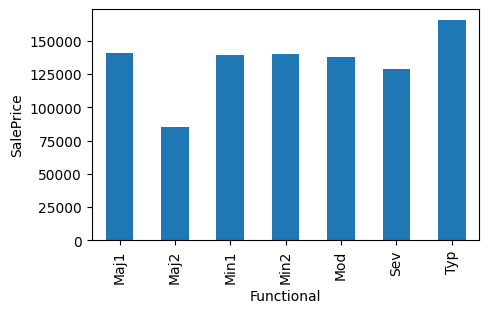

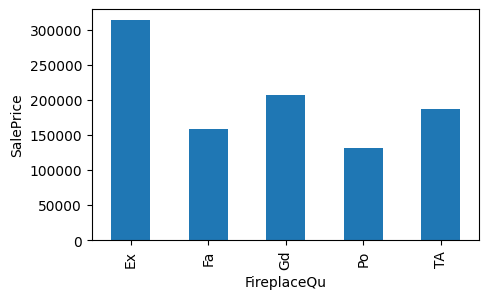

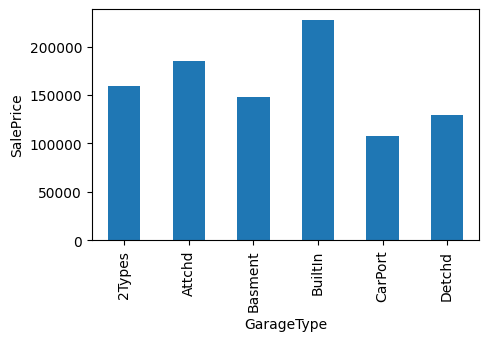

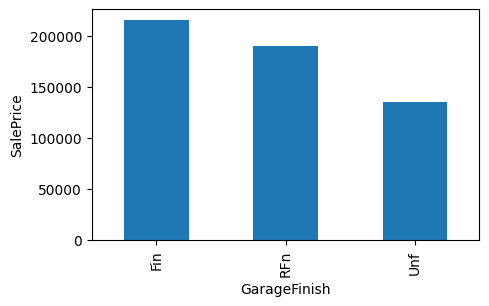

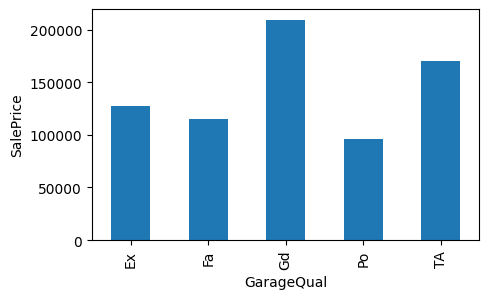

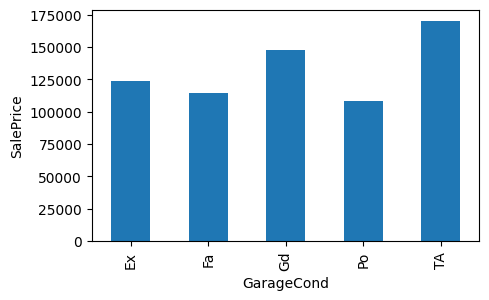

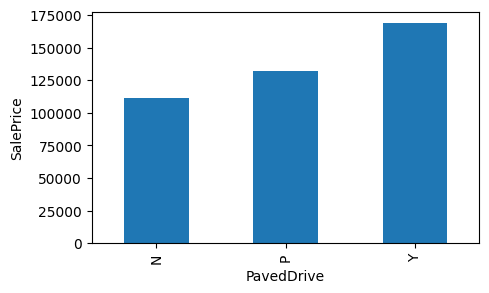

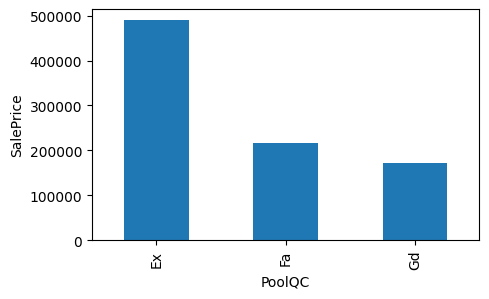

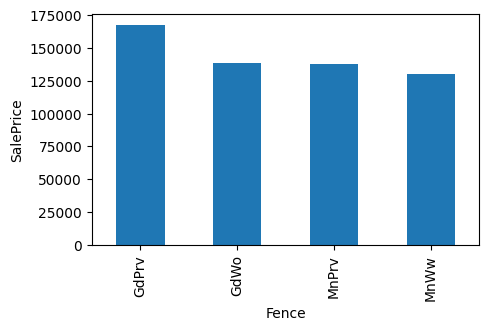

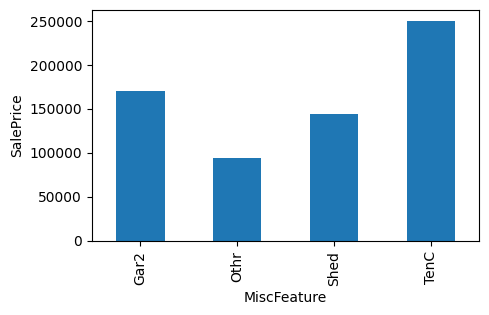

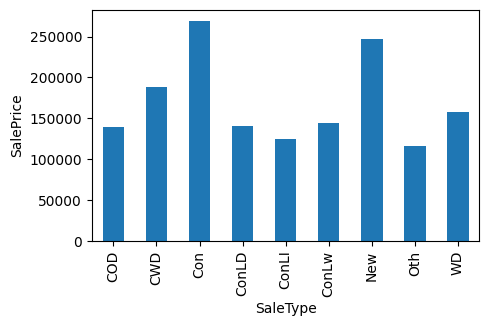

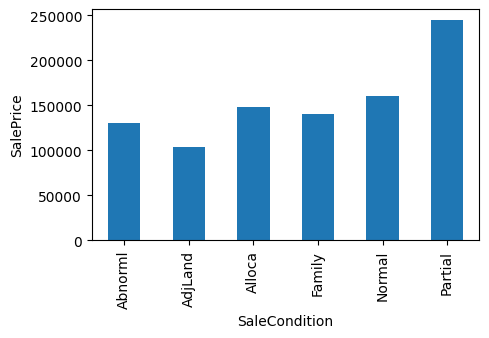

In [ ]:
# Relation between categorical variables and saleprice
for feature in cat_features:
  data=df_train.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar(figsize=(5,3))
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.show()

# Feature Engineering

⏰⏰⏰REMEMBER!!!!!!

In Kaggle projects, we combine train and test data in order to get better accuracy.

Whereas, in real world we shouldnt do that since it leads to data leakage

First do train test split, apply feature engineering in training data and then apply the same feature engineering on testing data.

# Handling Missing Values

- Categorical features

In [11]:
cat_null_features=[i for i in cat_features if df_train[i].isnull().sum()>1]
for i in cat_null_features:
  print("{}:{}% missing values".format(i,np.round(df_train[i].isnull().mean(),4)))

Alley:0.9377% missing values
MasVnrType:0.5973% missing values
BsmtQual:0.0253% missing values
BsmtCond:0.0253% missing values
BsmtExposure:0.026% missing values
BsmtFinType1:0.0253% missing values
BsmtFinType2:0.026% missing values
FireplaceQu:0.4726% missing values
GarageType:0.0555% missing values
GarageFinish:0.0555% missing values
GarageQual:0.0555% missing values
GarageCond:0.0555% missing values
PoolQC:0.9952% missing values
Fence:0.8075% missing values
MiscFeature:0.963% missing values


In [12]:
# replace missing values with a new label
def replace_label(dataset, features_nan):
  data=dataset.copy()
  data[features_nan]=data[features_nan].fillna('Missing')
  return data
dataset_train=replace_label(df_train,cat_null_features)

dataset_train[cat_null_features].isnull().sum()

,0
Alley,0
MasVnrType,0
BsmtQual,0
BsmtCond,0
BsmtExposure,0
BsmtFinType1,0
BsmtFinType2,0
FireplaceQu,0
GarageType,0
GarageFinish,0


In [ ]:
dataset_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


- numerical features

In [13]:
num_null_features=[i for i in num_features if dataset_train[i].isnull().sum()>1]
for i in num_null_features:
  print("{}:{}% missing values".format(i,np.round(dataset_train[i].isnull().mean(),4)))

LotFrontage:0.1774% missing values
MasVnrArea:0.0055% missing values
GarageYrBlt:0.0555% missing values


In [14]:
# replacing numerical features
for i in num_null_features:
  # since there are outliers, we use median
  median_value=dataset_train[i].median()

  #create a new feature to capture nan values
  dataset_train[i+'nan']=np.where(dataset_train[i].isnull(),1,0)
  dataset_train[i].fillna(median_value,inplace=True)

<ipython-input-14-39c443f02cdb>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_train[i].fillna(median_value,inplace=True)
<ipython-input-14-39c443f02cdb>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
dataset_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0


- Temporal variables

- 0 missing values in temporal variables
- We saw that, as year increases price descreased ( which should not be the case). So, we will capture the difference of other yearcolumns

In [15]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
  dataset_train[feature]=dataset_train['YrSold']-dataset_train[feature]

In [16]:
dataset_train[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


# Handling skewed distribution

In [17]:
con_nonzero_features=[i for i in con_features if 0 not in dataset_train[i].unique()]
print(con_nonzero_features)

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']


In [18]:
for i in con_nonzero_features:
  dataset_train[i]=np.log(dataset_train[i])

In [ ]:
dataset_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


# Handling rare categorical feature

The percentage of a category is very less compared to other categories in a variable

All the categories of each feature which are less than 0.01% are replaced with 'Rare_var'

In [19]:
frequent_categories = {}

for feature in cat_features:
    temp = dataset_train.groupby(feature)['SalePrice'].count() / len(dataset_train)
    temp_df = temp[temp > 0.01].index  # Keep categories with >1% frequency
    frequent_categories[feature] = list(temp_df)  # Save frequent categories
    dataset_train[feature] = np.where(dataset_train[feature].isin(temp_df), dataset_train[feature], 'Rare_var')

# Converting categorical features

In [20]:
category_mappings = {}
for i in cat_features:
    ordered_labels = dataset_train.groupby([i])['SalePrice'].mean().sort_values().index
    category_mappings[i] = {k: j for j, k in enumerate(ordered_labels, 0)}
    dataset_train[i] = dataset_train[i].map(category_mappings[i])

In [ ]:
dataset_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,...,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,...,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,...,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,...,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,...,2,0,12,2008,2,3,12.429216,0,0,0
5,6,50,3,4.442651,9.554993,1,2,1,1,1,...,1,700,10,2009,2,3,11.870600,0,0,0
6,7,20,3,4.317488,9.218705,1,2,0,1,1,...,2,0,8,2007,2,3,12.634603,0,0,0
7,8,60,3,4.234107,9.247829,1,2,1,1,1,...,1,350,11,2009,2,3,12.206073,1,0,0
8,9,50,1,3.931826,8.719317,1,2,0,1,1,...,2,0,4,2008,2,0,11.774520,0,0,0
9,10,190,3,3.912023,8.911934,1,2,0,1,1,...,2,0,1,2008,2,3,11.678440,0,0,0


# Feature Scaling

In [21]:
scaling_features=[i for i in dataset_train.columns if i not in ['Id','SalePrice']]
# i need not perform feature scaling for ID since it will be dropped
# feature scaling is not required to be done on target variable
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# standardscaler also works well, try both and see which one works better
scaler.fit(dataset_train[scaling_features])

MinMaxScaler()

In [22]:
 # transform the train and test sets, and add on the Id and SalePrice variables
data=pd.concat([dataset_train[['Id','SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset_train[scaling_features]),columns=scaling_features)],
                    axis=1)
scaler.transform(data[scaling_features])

array([[-0.11626298,  0.1875    , -0.97210387, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11764706,  0.1875    , -0.94365653, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11626298,  0.1875    , -0.96592221, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.11591696,  0.1875    , -0.97001217, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11764706,  0.1875    , -0.96592221, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11764706,  0.1875    , -0.95249854, ...,  0.        ,
         0.        ,  0.        ]])

In [23]:
data.to_csv('X_train.csv',index=False)

Follow the same process on test dataset

# Preprocessing test dataset

In [24]:
df_test=pd.read_csv("/content/test.csv")
print("Length of the testing set is:", len(df_test))

Length of the testing set is: 1459


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
#numerical features
num_features_test=[feature for feature in df_test.columns if df_test[feature].dtypes !='O']
print("Length of numerical features: ",len(num_features_test))

Length of numerical features:  37


In [26]:
#categorical features
cat_features_test=[feature for feature in df_test.columns if feature not in num_features_test]
print('Number of categorical features:', len(cat_features_test))

Number of categorical features: 43


In [27]:
# Missing values in categorical features
cat_null_features_test=[i for i in cat_features_test if df_test[i].isnull().sum()>1]
for i in cat_null_features_test:
  print("{}:{}% missing values".format(i,np.round(df_test[i].isnull().mean(),4)))

MSZoning:0.0027% missing values
Alley:0.9267% missing values
Utilities:0.0014% missing values
MasVnrType:0.6127% missing values
BsmtQual:0.0302% missing values
BsmtCond:0.0308% missing values
BsmtExposure:0.0302% missing values
BsmtFinType1:0.0288% missing values
BsmtFinType2:0.0288% missing values
Functional:0.0014% missing values
FireplaceQu:0.5003% missing values
GarageType:0.0521% missing values
GarageFinish:0.0535% missing values
GarageQual:0.0535% missing values
GarageCond:0.0535% missing values
PoolQC:0.9979% missing values
Fence:0.8012% missing values
MiscFeature:0.965% missing values


In [28]:
# replace missing values with a new label
def replace_label(dataset, features_nan):
  data=dataset.copy()
  data[features_nan]=data[features_nan].fillna('Missing')
  return data
dataset_test=replace_label(df_test,cat_null_features_test)

dataset_test[cat_null_features_test].isnull().sum()

,0
MSZoning,0
Alley,0
Utilities,0
MasVnrType,0
BsmtQual,0
BsmtCond,0
BsmtExposure,0
BsmtFinType1,0
BsmtFinType2,0
Functional,0


In [ ]:
dataset_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,...,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,...,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,...,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,...,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,...,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal


In [29]:
num_null_features_test=[i for i in num_features_test if dataset_test[i].isnull().sum()>1]
for i in num_null_features_test:
  print("{}:{}% missing values".format(i,np.round(dataset_test[i].isnull().mean(),4)))

LotFrontage:0.1556% missing values
MasVnrArea:0.0103% missing values
BsmtFullBath:0.0014% missing values
BsmtHalfBath:0.0014% missing values
GarageYrBlt:0.0535% missing values


In [30]:
# replacing numerical features
for i in num_null_features_test:
  # since there are outliers, we use median
  median_value=dataset_test[i].median()

  #create a new feature to capture nan values
  dataset_test[i+'nan']=np.where(dataset_test[i].isnull(),1,0)
  dataset_test[i].fillna(median_value,inplace=True)

<ipython-input-30-acb03e3cca5e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_test[i].fillna(median_value,inplace=True)
<ipython-input-30-acb03e3cca5e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
dataset_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,...,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,...,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,...,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,...,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,...,0,1,2010,WD,Normal,0,0,0,0,0


In [31]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
  dataset_test[feature]=dataset_test['YrSold']-dataset_test[feature]

In [32]:
dataset_test[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


In [33]:
# year features
year_features_test=[feature for feature in df_test.columns if 'Yr' in feature or 'Year' in feature]
year_features_test

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [34]:
dis_features_test=[feature for feature in num_features_test if len(df_test[feature].unique())<25 and feature not in year_features_test+['Id']]
# 25 is self given threshold
dis_count=len(dis_features_test)
dis_count

16

In [35]:
#continous features
con_features_test=[feature for feature in num_features_test if feature not in dis_features_test + year_features_test+['Id']]
print("NUmber of continous features:", len(con_features_test))

NUmber of continous features: 16


In [36]:
#handling skewed distribution
con_nonzero_features_test=[i for i in con_features_test if 0 not in dataset_test[i].unique()]
print(con_nonzero_features_test)

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']


In [37]:
for i in con_nonzero_features_test:
  dataset_test[i]=np.log(dataset_test[i])

In [ ]:
dataset_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,RH,4.382027,9.360655,Pave,Missing,Reg,Lvl,AllPub,...,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,RL,4.394449,9.565704,Pave,Missing,IR1,Lvl,AllPub,...,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,RL,4.304065,9.534595,Pave,Missing,IR1,Lvl,AllPub,...,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,RL,4.356709,9.208138,Pave,Missing,IR1,Lvl,AllPub,...,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,RL,3.761200,8.518193,Pave,Missing,IR1,HLS,AllPub,...,0,1,2010,WD,Normal,0,0,0,0,0


In [38]:
for feature in cat_features_test:
    dataset_test[feature] = np.where(
        dataset_test[feature].isin(frequent_categories[feature]),
        dataset_test[feature],
        'Rare_var'
    )

In [39]:
for i in cat_features_test:
    if i in category_mappings:
        dataset_test[i] = dataset_test[i].map(category_mappings[i])
        dataset_test[i].fillna(-1, inplace=True)  # Handle unknown categories

<ipython-input-39-3b5956f595fe>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_test[i].fillna(-1, inplace=True)  # Handle unknown categories
<ipython-input-39-3b5956f595fe>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

# Feature Selection

In [24]:
# modules for feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [25]:
data_new=pd.read_csv('X_train.csv')

In [49]:
data_new.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75


In [26]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   int64  
 1   SalePrice       1460 non-null   float64
 2   MSSubClass      1460 non-null   float64
 3   MSZoning        1460 non-null   float64
 4   LotFrontage     1460 non-null   float64
 5   LotArea         1460 non-null   float64
 6   Street          1460 non-null   float64
 7   Alley           1460 non-null   float64
 8   LotShape        1460 non-null   float64
 9   LandContour     1460 non-null   float64
 10  Utilities       1460 non-null   float64
 11  LotConfig       1460 non-null   float64
 12  LandSlope       1460 non-null   float64
 13  Neighborhood    1460 non-null   float64
 14  Condition1      1460 non-null   float64
 15  Condition2      1460 non-null   float64
 16  BldgType        1460 non-null   float64
 17  HouseStyle      1460 non-null   f

In [27]:
y_train=data_new[['SalePrice']]
X_train=data_new.drop(['Id','SalePrice'],axis=1)

In [28]:
# bigger the alpha value, the less features will be selected
feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
# whatever the random_state value we choose the same should be used for test data
feature_sel_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [29]:
feature_sel_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

True indicates that particular feature is important and false indicates that the feature is not important and we can skip it

In [33]:
# list of selected features
selected_features=X_train.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_features)))

total features: 82
selected features: 21


In [34]:
selected_features

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

In [35]:
X_train=X_train[selected_features]

Horray!!! 🥳

The dataset is now ready to build a model